In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
sns.set_style("darkgrid")

In [3]:
dfr = pd.read_pickle('/home/rouse_ai/nha/KLTN/ratings.pickle')
dfu = pd.read_pickle('/home/rouse_ai/nha/KLTN/user_info.pickle')
dfm = pd.read_pickle('/home/rouse_ai/nha/KLTN/movie_info.pickle')

In [5]:
dfu = pd.read_csv('/mnt/sda1/projects/rouse_ai/ml-1m/users.dat', sep='::', header=None, encoding='ISO-8859-1', engine='python',
                  names=['userID', 'gender', 'age','occupation', 'zipcode'])

In [6]:
dfu

,userID,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


<AxesSubplot: xlabel='gender', ylabel='count'>

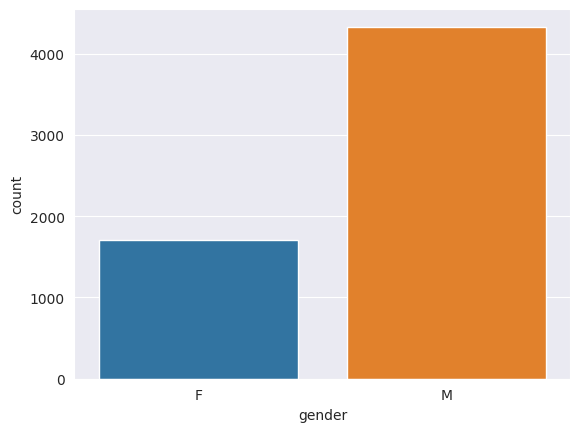

In [40]:
sns.countplot(data=dfu, x='gender')

In [67]:
age_mapping = {1:  "Under 18",
18:  "18-24",
25:  "25-34",
35:  "35-44",
45:  "45-49",
50:  "50-55",
56:  "56+"}
dfu['age'] = dfu['age'].replace(age_mapping)

<AxesSubplot: xlabel='age', ylabel='count'>

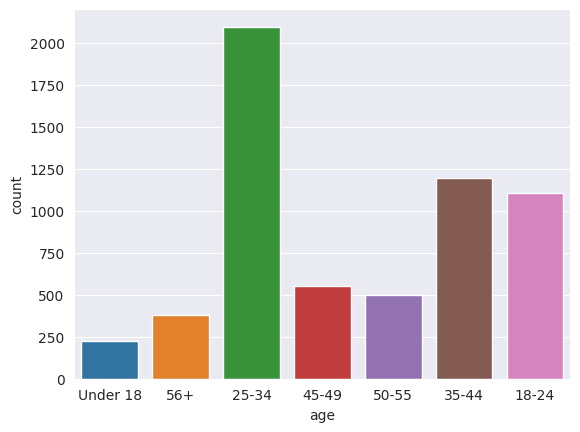

In [68]:
sns.countplot(data=dfu, x='age')

In [14]:
occupation_mapping = { 0: "other or not specified", 1: "academic/educator", 2: "artist", 3: "clerical/admin", 4: "college/grad student", 5: "customer service", 6: "doctor/health care", 7: "executive/managerial", 8: "farmer", 9: "homemaker", 10: "K-12 student", 11: "lawyer", 12: "programmer", 13: "retired", 14: "sales/marketing", 15: "scientist", 16: "self-employed", 17: "technician/engineer", 18: "tradesman/craftsman", 19: "unemployed", 20: "writer", }

In [15]:
dfu['occupation'] = dfu['occupation'].replace(occupation_mapping)

,index,occupation
0,college/grad student,759
1,other or not specified,711
2,executive/managerial,679
3,academic/educator,528
4,technician/engineer,502
5,programmer,388
6,sales/marketing,302
7,writer,281
8,artist,267
9,self-employed,241


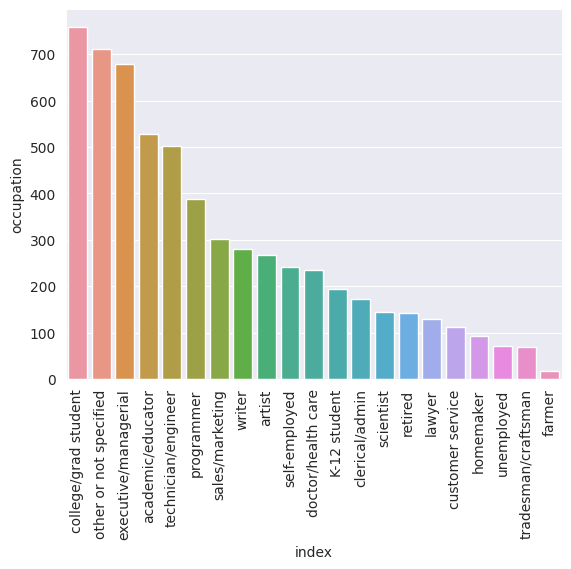

In [41]:
sns.barplot(x=dfu['occupation'].value_counts().to_frame().reset_index()['index'], y=dfu['occupation'].value_counts().to_frame().reset_index()['occupation']);
plt.xticks(rotation=90);

In [27]:
dfm = pd.read_csv('/mnt/sda1/projects/rouse_ai/ml-1m/movies.dat', sep='::', header=None, encoding='ISO-8859-1', engine='python',
                  names=['movieID' , 'title' , 'genres_str'])

In [28]:
dfm['year'] = dfm['title'].map(lambda x: x[-5:-1])
dfm['year'] = dfm['year'].astype(int)

In [30]:
dfm['genres'] = dfm['genres_str'].map(lambda x: x.split('|'))

In [31]:
dfm

,movieID,title,genres_str,year,genres
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),Comedy,1995,[Comedy]
...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000,[Comedy]
3879,3949,Requiem for a Dream (2000),Drama,2000,[Drama]
3880,3950,Tigerland (2000),Drama,2000,[Drama]
3881,3951,Two Family House (2000),Drama,2000,[Drama]


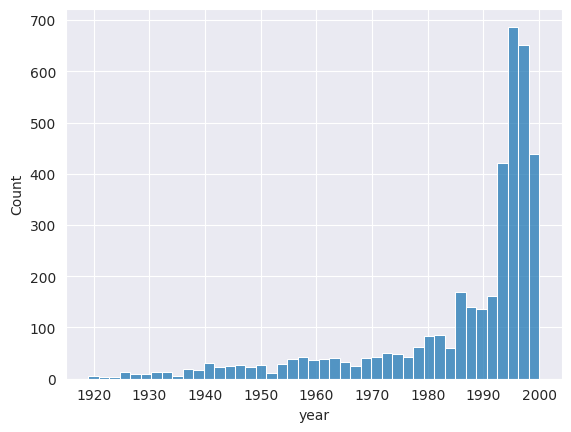

In [66]:
sns.histplot(dfm['year']);

In [33]:
dfm["num_genres"] = dfm["genres"].map(lambda x: len(x))

<AxesSubplot: xlabel='num_genres', ylabel='count'>

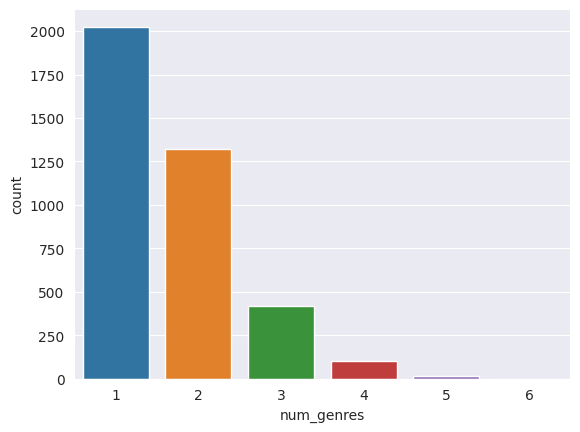

In [42]:
sns.countplot(x=dfm["num_genres"])

In [56]:
genres_counter.values()

dict_values([105, 251, 1200, 283, 68, 471, 1603, 503, 211, 492, 343, 276, 127, 143, 114, 106, 44, 68])

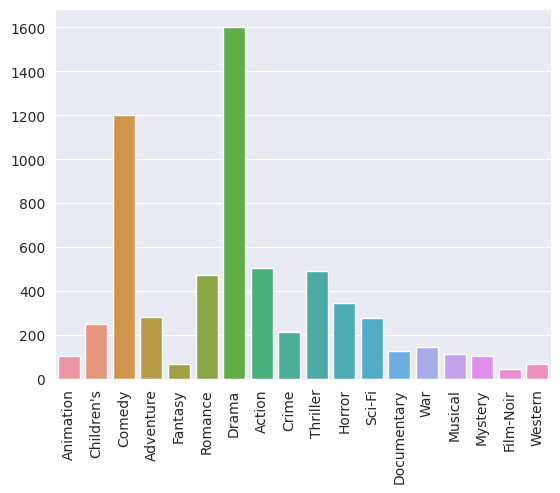

In [57]:
from collections import defaultdict

genres_counter = defaultdict(int)
for genre_str in dfm["genres"]:
    for genre in genre_str:
        genres_counter[genre] += 1
        

sns.barplot(x=list(genres_counter.keys()), y=list(genres_counter.values()));
plt.xticks(rotation=90);

<AxesSubplot: xlabel='rating', ylabel='count'>

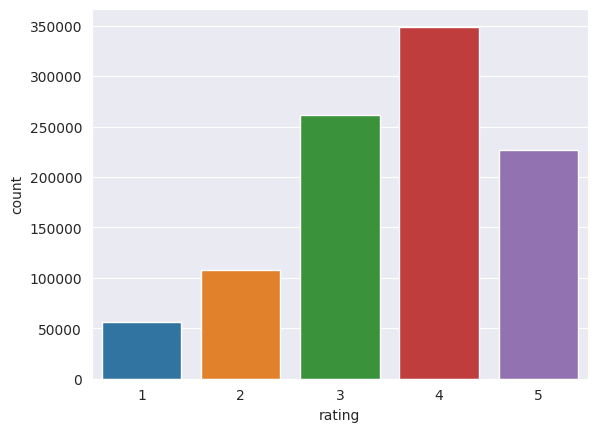

In [64]:
sns.countplot(data=dfr, x='rating')